In [9]:
#!pip install xgboost

In [2]:
import xgboost as xgb
#from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
raw_dataset = pd.read_csv('NFT_G_dataset-PTC.csv')

x = raw_dataset.iloc[:, : -1].values
y = raw_dataset.iloc[:, 11].values
raw_dataset

,DAT(days),Temp,WC,NL,N(PTC) (mg/g),P(PTC) (mg/g),K(PTC) (mg/g),Ca(PTC) (mg/g),Mg(PTC) (mg/g),S(PTC) (mg/g),Na(PTC) (mg/g),Diameter of Bulb(mm)
0,1,18.3,0.09,5.88,33.56,4.90,37.29,7.25,2.14,1.93,0.77,19.98
1,2,19.8,0.10,5.94,34.60,4.91,38.56,7.36,2.15,1.94,0.78,20.03
2,3,18.3,0.11,6.05,35.20,4.92,39.61,7.45,2.16,1.95,0.79,20.76
3,4,16.9,0.12,6.09,36.19,4.93,40.23,7.59,2.17,1.96,0.80,21.07
4,5,18.9,0.13,6.13,37.82,4.94,41.45,7.61,2.18,1.97,0.81,21.11
...,...,...,...,...,...,...,...,...,...,...,...,...
86,88,29.5,14.13,13.58,39.22,7.39,51.11,12.24,1.40,3.56,2.20,97.14
87,89,27.9,14.42,13.62,38.58,7.40,50.89,12.20,1.38,3.57,2.21,97.48
88,90,27.1,14.83,13.69,38.38,7.41,50.64,12.16,1.36,3.58,2.22,98.85
89,91,26.1,14.96,13.71,37.46,7.42,50.34,12.11,1.34,3.59,2.23,99.14


In [4]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.15)


In [5]:
%%time
xgbr = xgb.XGBRegressor(verbosity=0)
#print(xgbr)

xgbr.fit(xtrain, ytrain)
 
score = xgbr.score(xtrain, ytrain)   
print("Training score: ", score) 
 
# - cross validataion 
scores = cross_val_score(xgbr, xtrain, ytrain, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, xtrain, ytrain, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
 
ypred = xgbr.predict(xtest)
r2 = 1 - sum((ytest - ypred) ** 2)/sum((ytest - np.mean(ytest)) ** 2)
#r2 = r2_score(ytest,ypred)
mse = mean_squared_error(ytest, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))



Training score:  0.99999999749756
Mean cross-validation score: 0.99
K-fold CV average score: 0.98
MSE: 3.74
RMSE: 1.93
Wall time: 1.36 s


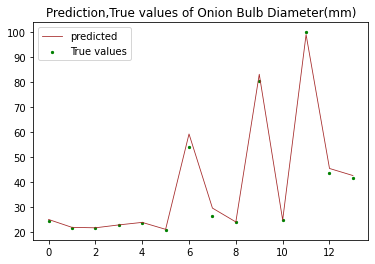

In [6]:
x_ax = range(len(ytest))
plt.title('Prediction,True values of Onion Bulb Diameter(mm)')
plt.scatter(x_ax, ytest, s=5, color="green", label="True values")
plt.plot(x_ax, ypred, lw=0.8, color="brown", label="predicted")
plt.legend()
plt.show()

In [7]:
print('ypred =',ypred)

ypred = [24.95279  21.787102 21.608444 22.76838  23.780499 20.992462 59.25427
 29.521072 23.958954 83.21368  24.732647 99.13046  45.41712  42.579586]


In [8]:
print('r2_score = ',r2)

r2_score =  0.993397717036594
